# Neural Networks for MNIST Digit Recognition

In this homework, you will implement neural networks to classify handwritten digits using raw pixels as features. You will be using the MNIST digits dataset that you used in previous homework assignments.

The state-of-the-art error rate on this dataset using deep convolutional neural networks is around 0.5%. For this assignment, you should, with appropriate parameter settings, get approximately or better than 6% error using a neural network with one hidden layer.

## Multi-Layer Feed Forward Neural Network

In this assignment, you are asked to implement a neural network with one hidden layer.

You will have a total of three layers: the input layer, the hidden layer, and the output layer. Pay careful attention to the following implementation details presented.

1. You will be using a hidden layer of size 200. Let $n_{in}$ = 784, the number of features for the digits class. Let $n_{hid}$ = 200, the size of the hidden layer. Finally, let nout = 10, the number of classes. Then, you will have nin + 1 units in the input layer, $n_{hid}$ + 1 units in the hidden layer, and nout units in the output layer. The input and hidden layers have one additional unit which always takes a value of 1 to represent bias. The output layer size is set to the number of classes. Each label will have to be transformed to a vector of length 10 which has a single 1 in the position of the true class and 0 everywhere else.

2. The parameters of this model are the following:

    * $\mathbf{W^{(1)}}$, a ($n_{in}$ + 1)-by-$n_{hid}$ matrix where the $(i, j)$-entry represents the weight connecting the i-th unit in the input layer to the j-th unit in the hidden layer. Note: there is an additional row for weights connecting the bias term to each unit in the hidden layer.

    * $\mathbf{W^{(2)}}$, a ($n_{hid}$ + 1)-by-$n_{out}$ matrix where the $(i, j)$-entry represents the weight connecting the i-th unit in the hidden layer to the j-th unit in the output layer. Note: again there is an additional row for weights connecting the bias term to each unit in the output layer.
3. You will be expected to train and run your neural network using both mean-squared error and cross-entropy error as your loss function (one network for each loss function). Suppose y is the ground truth label (using the same 1-of-$n_{out}$ encoding as stated previously in point 1) and $h(x)$ is a vector containing each value of the units in the output layer given the feature vector x. Then, the mean-squared error is
$$J = \dfrac{1}{2}\sum^{n_{out}}_{k=1} (y_k - h_k(x))^2$$
The cross-entropy error is given as:
$$J = - \sum^{n_{out}}_{k=1} [ y_k \ln h_k(x) + (1 - y_k)\ln(1 - h_k(x))) ]$$
4. All hidden units should use the tanh activation function as the choice of non-linear function and the output units should use the sigmoid function as its choice. Remember the sigmoid function is given as
$$g(z) = \dfrac{1}{1 + e^{-z}}$$
5. You will be using stochastic gradient descent to update your weights.

## Problems

#### 1. Derive the stochastic gradient descent updates for all parameters ($\mathbf{W^{(1)}}$ and $\mathbf{W^{(2)}}$) for both mean-squared error and cross-entropy error as your loss function given a single data point $(x, y)$. Use tanh activation function for the hidden layer units and the sigmoid function for the output layer units. To do this, you must compute the partial derivative of $J$ with respect to every $\mathbf{W_{ij}^{(1)}}$ and $\mathbf{W_{ij}^{(2)}}$. Use the notation provided above. Please be clear when adding new notation used in the derivation. The following information might be helpful to you:
* The derivative of $\textrm{tanh}(z)$ is $1 - \textrm{tanh}^2(z)$.
* The derivative of the sigmoid function $g(z)$ is $g(z)(1 - g(z))$

**Answer:**

For hidden layers:

$$
\begin{align}
g(z) &= \tanh(z) \\
g'(z) &= 1 - (g(z))^2
\end{align}
$$

Forward Propogation:

\begin{align}
z^{(2)} &= W^{(1)} x + b^{(1)} \\
a^{(2)} &= f(z^{(2)}) \\
z^{(3)} &= W^{(2)} a^{(2)} + b^{(2)} \\
h_{W,b}(x) &= a^{(3)} = f(z^{(3)})
\end{align}

Back Propagation = gradient descent + chain rule

$$w_{ij}^{(l)} \leftarrow w_{ij}^{(l)} - \eta \dfrac{\partial J}{\partial w_{ij}^{(l)}}$$

$$\dfrac{\partial J}{\partial w_{ij}^{(l)}} = \dfrac{\partial J}{\partial y_j} \dfrac{\partial y_j}{\partial z_j'} \dfrac{\partial z_j'}{w_{ij}^{(l)}}$$

#### 2. Train this multi-layer neural network on full training data using stochastic gradient descent. Predict the labels to the test data and submit your results to Kaggle. Please also report the following:
* Parameters that you tuned including learning rate, when you stopped training, how you initialized the weights
* Training accuracy and validation accuracy
* Running-time (Total training time)
* Plots of total training error and classification accuracy on training set vs. iteration. If you find that evaluating error takes a long time, you may compute the error or accuracy every 1000 or so iterations.
* Comment on the differences in using the two loss functions. Which performs better?

**Answer:**

I used a learning rate, $\eta$, of 0.001 and initialized my weights with mean 0 and standard deviation 0.01. I did not use any stopping criteria. The only preprocessing I used was dividing all values in the training set by 255 to limit the values to be between 0 and 1.

After shuffling the data, I created training and validation sets of 50,000 and 10,000 observations, respectfully. I then performed 200,000 iterations of stochastic gradient descent to update my weights. Here are my results:

|                         | Mean squared error | Cross entropy error |
| :---------------------- | :----------------- | :------------------ |
| Training accuracy       | 80.0%              | 92.0%               |
| Validation accuracy     | 80.0%              | 92.0%               |
| Running time            | 12 min             | 10 min              | 
    
Beginning almost immediately, cross entropy before much better than mean squared error. They both continued to improve with the number of iterations, but only marginally beyond a certain point.

In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder
from NeuralNetwork import NeuralNetwork
from utils import accuracy, save_prediction, make_plot, time_fn
import matplotlib.pylab as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(289)

In [2]:
train = loadmat('./dataset/train.mat')
test = loadmat('./dataset/test.mat')

X_test = test['test_images'].T.reshape(10000, 784)/255

X = train['train_images'].T.reshape(60000, 784)/255
y = train['train_labels']

enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(y)

# shuffle data
i = np.random.permutation(60000)
X = X[i,:]
y = y[i,:]

# split training and validation data
X_train = X[:50000]
y_train = y[:50000]

X_validation = X[50000:]
y_validation = y[50000:]

#### Train Mean Squared Error Model

In [3]:
ms_nn = NeuralNetwork(loss='mean_squared', bias=1)

_, ms_accuracy = time_fn(
    "Neural Network w/ Mean Squared Error",
    ms_nn.fit,
    X_train,
    y_train,
    iterations=200000,
    eta=0.001,
    alpha=0,
    batch_size=1,
    compute_at_iter=1000
)

Neural Network w/ Mean Squared Error: 12.15 min


In [4]:
ms_training_acc = accuracy(ms_nn.predict(X_train), np.argmax(y_train, axis=1))
ms_validation_acc = accuracy(ms_nn.predict(X_validation), np.argmax(y_validation, axis=1))

print('Mean Squared')
print('* Training Accuracy:  ', ms_training_acc)
print('* Validation Accuracy:', ms_validation_acc)

Mean Squared
* Training Accuracy:   0.81328
* Validation Accuracy: 0.8128


#### Train Cross Entropy Error Model

In [5]:
ce_nn = NeuralNetwork(loss='cross_entropy', bias=1)

_, ce_accuracy = time_fn(
    "Neural Network w/ Cross Entropy Error",
    ce_nn.fit, 
    X_train, 
    y_train,
    iterations=200000,
    eta=0.001,
    alpha=0,
    batch_size=1,
    compute_at_iter=1000
)

Neural Network w/ Cross Entropy Error: 10.22 min


In [6]:
ce_training_acc = accuracy(ce_nn.predict(X_train), np.argmax(y_train, axis=1))
ce_validation_acc = accuracy(ce_nn.predict(X_validation), np.argmax(y_validation, axis=1))

print('Cross Entropy')
print('* Training Accuracy:  ', ce_training_acc)
print('* Validation Accuracy:', ce_validation_acc)

Cross Entropy
* Training Accuracy:   0.92298
* Validation Accuracy: 0.9169


#### Generate Plots

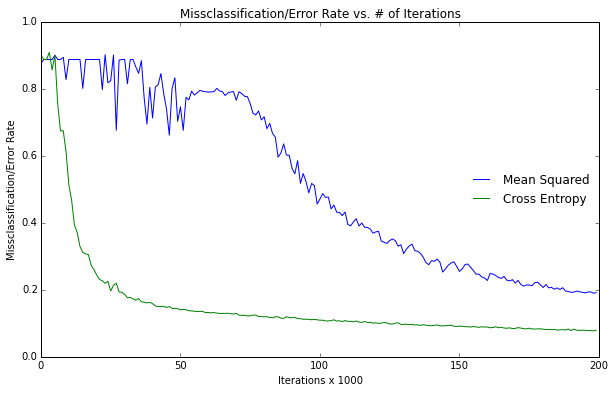

In [7]:
make_plot(
    data=[[1-x for x in ms_accuracy], 
          [1-x for x in ce_accuracy]],
    labels=['Mean Squared', 'Cross Entropy'],
    title='Missclassification/Error Rate vs. # of Iterations',
    ylim=1,
    ylab='Missclassification/Error Rate',
    xlab='Iterations x 1000'
)

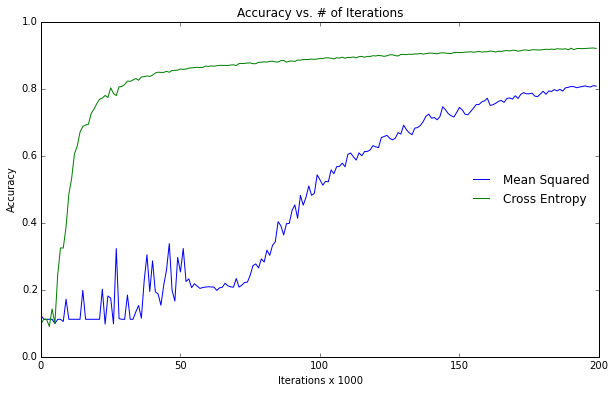

In [8]:
make_plot(
    data=[ms_accuracy, 
          ce_accuracy],
    labels=['Mean Squared', 'Cross Entropy'],
    title='Accuracy vs. # of Iterations',
    ylim=1,
    ylab='Accuracy',
    xlab='Iterations x 1000'
)

#### 3. **(Optional)** After you have implemented this basic multi-layer neural network and have reported all results, you may do some of the following or anything else to improve your neural network for your Kaggle submission. Please include any of these extra features you have implemented in your report.

* Use more than one hidden layer or change the number of hidden layer units. When using more layers (deeper networks) you may want to look into initializing your weights using auto-encoders and using ReLU (see next bullet point) for faster convergence and better performance.
* Use ReLU (rectified linear units) as your non-linear activation function for your hidden layer units. The rectifier is given as $$f(x) = \textrm{max}(0, x)$$ You will have to re-derive stochastic gradient descent updates. It is largely observed that using ReLU as the non-linear activation function allows the neural network to converge faster. Try to see if that is true for this case.
* Rather than using stochastic gradient descent, implement using mini-batch or batch gradient descent. If you implement mini-batch, try batches of sizes between 200-500.

**Answer:**

Using the full dataset with 60,000 observations, I trained a model that achieved an accuracy score of 97.94% on Kaggle, with class rank of #9 on the public leaderboard as of 7pm 11/24/15 (username: **jsemer**). I used the following approach/parameters:

* Normalized data by dividing pixel values by 255
* Weights initialized using a gaussian distribution with mean 0 and standard deviation 0.01 
* Learning rate, $\eta$, of 0.001
* momentum, $\alpha$, of 0.01
* 120,000 iterations of mini-batch gradient descent of size 200